**Python Sprint1Project- Data Analysis on Bitcoin and Cryptocurrency Data**

**Problem Statement:** *This project aims to conduct a comprehensive analysis of Bitcoin and other major cryptocurrencies, covering price trends, volatility patterns, trading volume dynamics, market sentiment, moving averages etc. By leveraging historical data and employing various data analysis techniques, we seek to uncover insights into the intricacies of cryptocurrency markets, providing a holistic view for investors, analysts, and enthusiasts.*

**DATA CLEANING**

In [ ]:
import pandas as pd     #Importing pandas library as pd
import matplotlib.pyplot as plt     #Importing the Pyplot sub-module of Matplotlib library as plt
import seaborn as sns     #Importing seaborn library as sns

In [330]:
#Reading the dataset which is the csv file
df = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\1inch.csv")

# Display the first few rows to understand the structure of the data
print(df.head(),'\n')

         Date      Open      High       Low     Close       Volume Currency
0  2020-12-25  1.602781  2.918094  1.375262  2.328544  638225549.0      USD
1  2020-12-26  2.318946  2.434916  1.582264  1.596896  237653073.0      USD
2  2020-12-27  1.597744  1.630781  1.056657  1.062112  183978307.0      USD
3  2020-12-28  1.064454  1.254447  1.049051  1.110076  119337529.0      USD
4  2020-12-29  1.110460  1.111282  0.761151  0.887798  137916899.0      USD 



In [331]:
# Check for missing values
print(df.isnull().sum(),'\n')

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64 



In [332]:
#'Date' column is converted to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [340]:
#Reading the dataset which is the csv file
df = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\1inch.csv")

#'Date' is set as the index
df.set_index('Date', inplace=True)

# Display the cleaned dataset
print(df.head())

                Open      High       Low     Close       Volume Currency
Date                                                                    
2020-12-25  1.602781  2.918094  1.375262  2.328544  638225549.0      USD
2020-12-26  2.318946  2.434916  1.582264  1.596896  237653073.0      USD
2020-12-27  1.597744  1.630781  1.056657  1.062112  183978307.0      USD
2020-12-28  1.064454  1.254447  1.049051  1.110076  119337529.0      USD
2020-12-29  1.110460  1.111282  0.761151  0.887798  137916899.0      USD


In [341]:
df['Currency'].value_counts()

Currency
USD    606
Name: count, dtype: int64

In [344]:
df=df.drop(columns=['Currency'])

In [336]:
print(df.head())

                Open      High       Low     Close       Volume
Date                                                           
2020-12-25  1.602781  2.918094  1.375262  2.328544  638225549.0
2020-12-26  2.318946  2.434916  1.582264  1.596896  237653073.0
2020-12-27  1.597744  1.630781  1.056657  1.062112  183978307.0
2020-12-28  1.064454  1.254447  1.049051  1.110076  119337529.0
2020-12-29  1.110460  1.111282  0.761151  0.887798  137916899.0


In [362]:
#Reading the dataset which is the csv file
df = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\1inch.csv")

# Create lag features for 'Close' prices
df['Close_Lag1'] = df['Close'].shift(1)

# Rename columns for consistency
df.rename(columns={'Volume': 'Vol.'}, inplace=True)

# Drop duplicates based on specific columns
df.drop_duplicates(subset=['Date', 'Close'], inplace=True)

# Standardize text case in string columns
df['Currency'] = df['Currency'].str.upper()

In [363]:
# Highlight the highest and lowest points
highest_point = df[df['Close'] == df['Close'].max()]  # Use 'Close' 
lowest_point = df[df['Close'] == df['Close'].min()]    # Use 'Close'

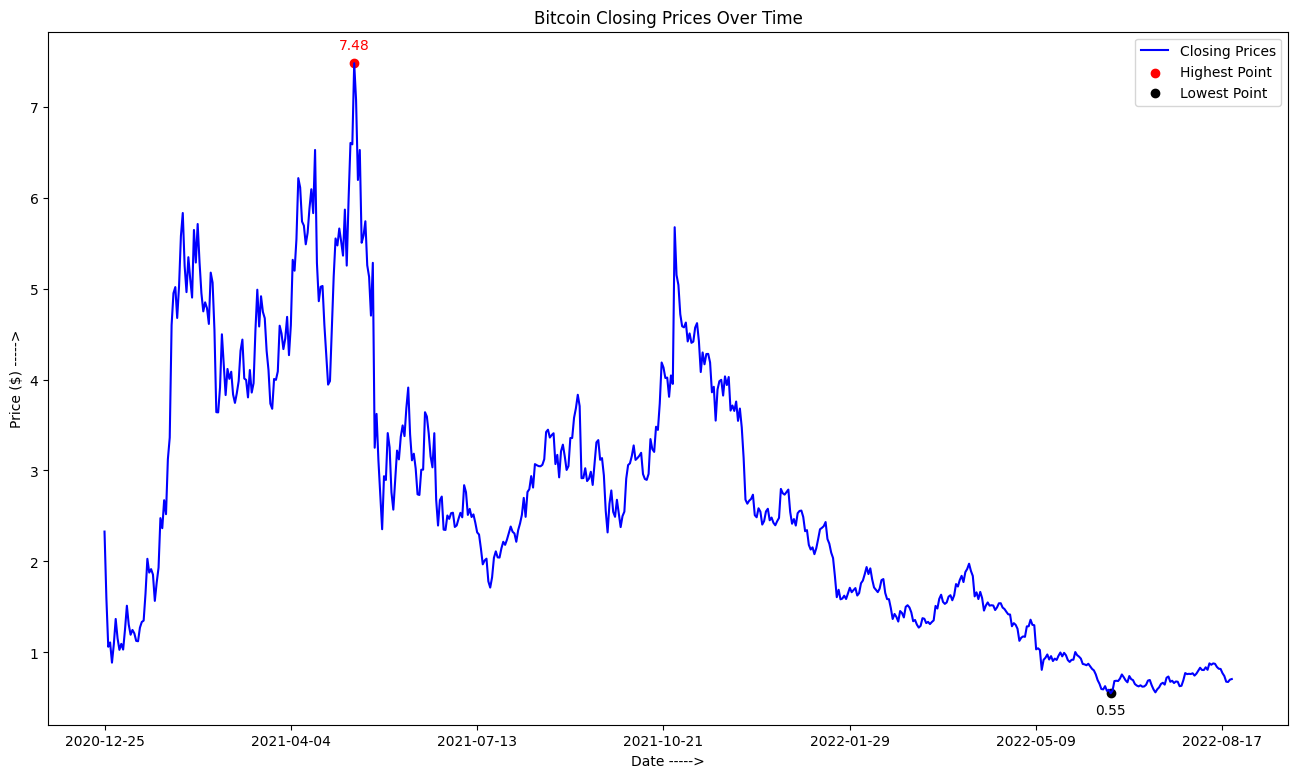

In [364]:
# Plotting Closing Prices over Time
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Prices')

plt.scatter(highest_point['Date'], highest_point['Close'], color='red', label='Highest Point')
plt.scatter(lowest_point['Date'], lowest_point['Close'], color='black', label='Lowest Point')

# Annotate the points with their values
for i, txt in enumerate(highest_point['Close']):
    plt.annotate(f'{txt:.2f}', (highest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

for i, txt in enumerate(lowest_point['Close']):
    plt.annotate(f'{txt:.2f}', (lowest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, -15), ha='center', color='black')

plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date ----->')
plt.ylabel('Price ($) ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::100], rotation=0)  # Adjust the step value as needed

plt.show()

1. From the plot of Bitcoin Closing Prices Over Time, we can see that the range of price is increasing and decreasing on an interval of two months.
1. The plotting is done based on the datas between January 2021 to September 2022.
1. While we can see that on May 2021 highest range of closing price is observed which is 7.48. On the other side, it is visible that on June 2022, lowest range of closing price is seen which is 0.55.
1. The fluctuation in closing prices suggests a degree of volatility in the market. Rapid price changes may attract both short-term traders and long-term investors seeking opportunities.
1. The highest point (red) represents the peak closing price. 
1. The lowest point (black) indicates a trough in closing prices.Investigating the reasons behind this trough, such as market corrections, regulatory changes, or external factors, can offer valuable information.
1. Anomalies or outliers in the closing prices may warrant further investigation. Sudden spikes or drops could be influenced by external factors, technical glitches, or exceptional market condition.mens in market dynamics.n.ry 

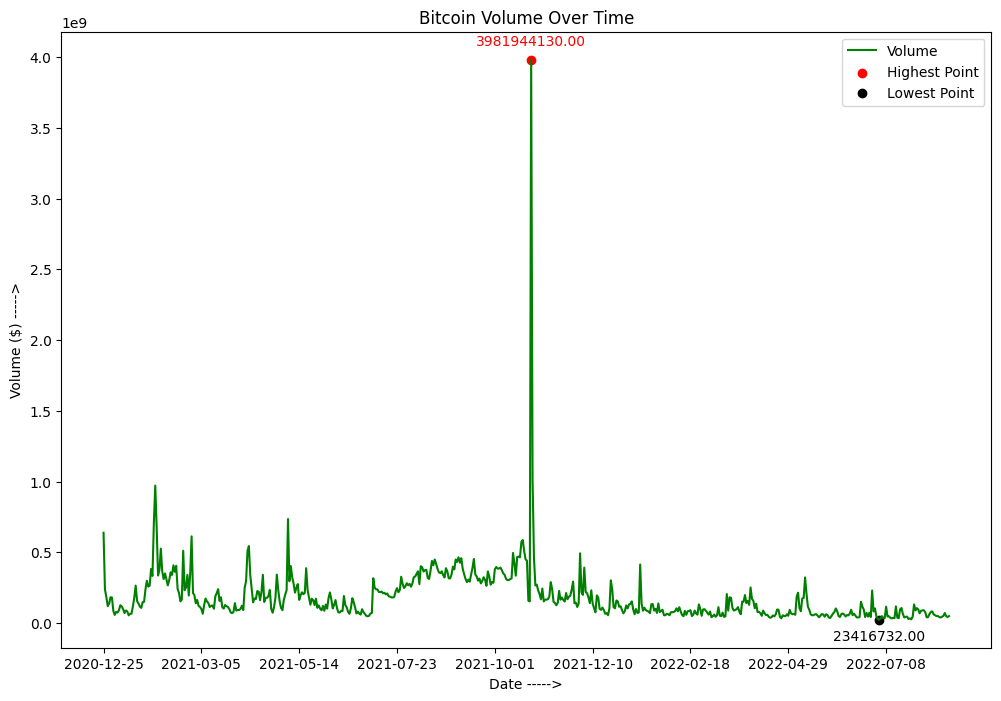

In [365]:
# Plotting Volume over Time

# Rename columns for consistency
df.rename(columns={'Volume': 'Vol.'}, inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Vol.'], color='green', label='Volume')

# Highlight the highest and lowest points
highest_point = df[df['Vol.'] == df['Vol.'].max()]  # Use 'Vol.'
lowest_point = df[df['Vol.'] == df['Vol.'].min()]    # Use 'Vol.'

plt.scatter(highest_point['Date'], highest_point['Vol.'], color='red', label='Highest Point')
plt.scatter(lowest_point['Date'], lowest_point['Vol.'], color='black', label='Lowest Point')

# Annotate the points with their values
for i, txt in enumerate(highest_point['Vol.']):
    plt.annotate(f'{txt:.2f}', (highest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

for i, txt in enumerate(lowest_point['Vol.']):
    plt.annotate(f'{txt:.2f}', (lowest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, -15), ha='center', color='black')

plt.title('Bitcoin Volume Over Time')
plt.xlabel('Date ----->')
plt.ylabel('Volume ($) ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::70], rotation=0)  # Adjust the step value as needed

plt.show()

1. The main line plot of Bitcoin trading volume over time provides an overview of the general trend in trading activity. 
1. The highlighted points represent instances of exceptionally high and low trading volumes. Explore the corresponding dates and values to identify specific events or periods that led to these extremes.
1. High trading volumes could be associated with significant market events, such as price rallies, selloffs, or major news releases. Low volumes may signify periods of market consolidation or reduced investor interest.
1. Identify any unusual patterns or outliers in the volume data. Sudden spikes or drops in volume might indicate anomalies that warrant further investigation.
1. Compare the highlighted points with external factors like major news events, regulatory changes, or developments in the cryptocurrency ecosystem. This can help correlate volume spikes with external catalysts.
1. Traders often use volume analysis as part of their strategy. High volumes during price increases or decreases can provide confirmation signals, while low volumes during trends might suggest weakening momentum.
1. Volume can be an indicator of market sentiment. For example, increasing volume during a price uptrend may indicate strong bullish sentiment, while decreasing volume during an uptrend might signal weakening momentum.

**DATA ANALYSIS AND DATA VISUALISATION**

In [366]:
# Calculate 30-day and 90-day moving averages
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()
df['90_Day_MA'] = df['Close'].rolling(window=90).mean()

In [367]:
# Find maximum and minimum points
max_close = df.loc[df['Close'].idxmax()]
min_close = df.loc[df['Close'].idxmin()]

max_ma_30 = df.loc[df['30_Day_MA'].idxmax()]
min_ma_30 = df.loc[df['30_Day_MA'].idxmin()]

max_ma_90 = df.loc[df['90_Day_MA'].idxmax()]
min_ma_90 = df.loc[df['90_Day_MA'].idxmin()]

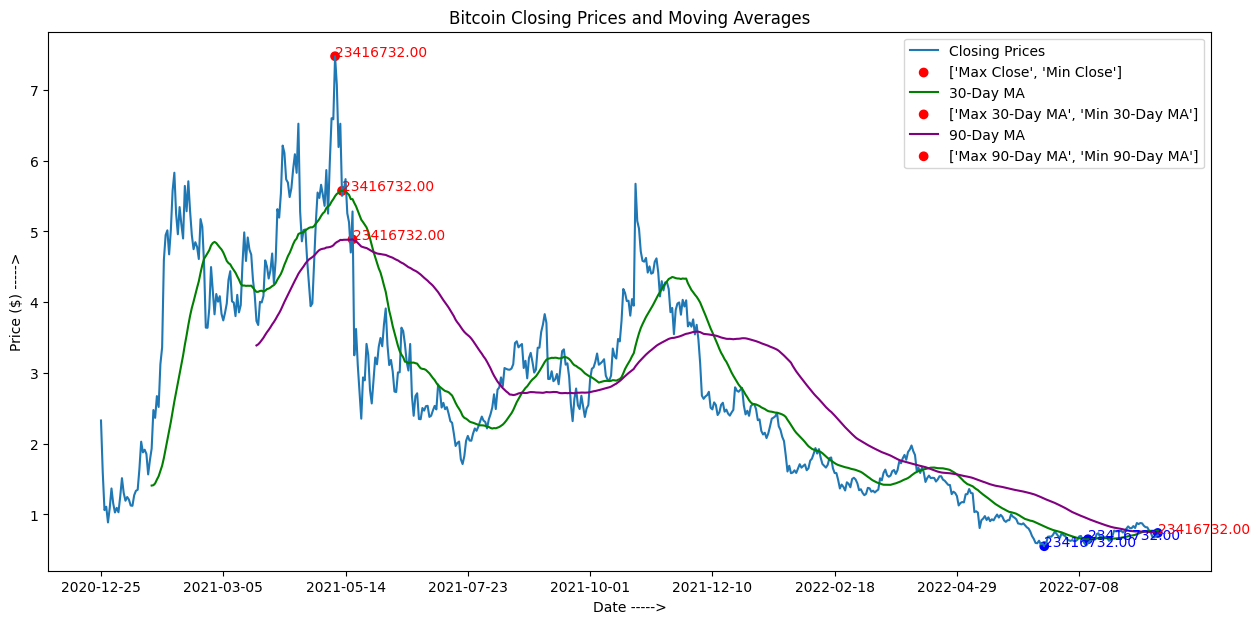

In [368]:
#Plotting the Bitcoin Closing Prices and Moving Averages plot

plt.figure(figsize=(15, 7))

# Closing Prices
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.scatter([max_close['Date'], min_close['Date']], [max_close['Close'], min_close['Close']], color=['red', 'blue'], label=['Max Close', 'Min Close'])
plt.annotate(f'{txt:.2f}', xy=(max_close['Date'], max_close['Close']), xytext=(max_close['Date'], max_close['Close'] + 0), color='red')
plt.annotate(f'{txt:.2f}', xy=(min_close['Date'], min_close['Close']), xytext=(min_close['Date'], min_close['Close'] - 0), color='blue')

# 30-Day MA
plt.plot(df['Date'], df['30_Day_MA'], label='30-Day MA', color='green')
plt.scatter([max_ma_30['Date'], min_ma_30['Date']], [max_ma_30['30_Day_MA'], min_ma_30['30_Day_MA']], color=['red', 'blue'], 
            label=['Max 30-Day MA', 'Min 30-Day MA'])
plt.annotate(f'{txt:.2f}', xy=(max_ma_30['Date'], max_ma_30['30_Day_MA']), xytext=(max_ma_30['Date'], max_ma_30['30_Day_MA'] + 0), color='red')
plt.annotate(f'{txt:.2f}', xy=(min_ma_30['Date'], min_ma_30['30_Day_MA']), xytext=(min_ma_30['Date'], min_ma_30['30_Day_MA'] - 0), color='blue')

# 90-Day MA
plt.plot(df['Date'], df['90_Day_MA'], label='90-Day MA', color='purple')
plt.scatter([max_ma_90['Date'], min_ma_90['Date']], [max_ma_90['90_Day_MA'], min_ma_90['90_Day_MA']], color=['red', 'blue'], 
            label=['Max 90-Day MA', 'Min 90-Day MA'])
plt.annotate(f'{txt:.2f}', xy=(max_ma_90['Date'], max_ma_90['90_Day_MA']), xytext=(max_ma_90['Date'], max_ma_90['90_Day_MA'] + 0), color='red')
plt.annotate(f'{txt:.2f}', xy=(min_ma_90['Date'], min_ma_90['90_Day_MA']), xytext=(min_ma_90['Date'], min_ma_90['90_Day_MA'] - 0), color='red')


# Plotting Moving Averages along with Closing Prices
plt.title('Bitcoin Closing Prices and Moving Averages')
plt.xlabel('Date ----->')
plt.ylabel('Price ($) ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::70], rotation=0)  # Adjust the step value as needed

plt.show()

- On one single plot, we are creating three subplots which are of Closing Price, 30- day Moving Averages and 90- day Moving Averages.
- From this plot, we can infer that:
    1. The plot incorporates Closing Prices along with 30-day and 90-day Moving Averages (MAs). Moving averages are commonly used to smooth out short-term fluctuations and highlight longer-term trends.
    1. Identify points where the short-term (30-day) moving average crosses above or below the long-term (90-day) moving average. These crossovers may indicate potential trend reversals or confirmations.
    1. The plot highlights maximum and minimum points for Closing Prices, 30-day MA, and 90-day MA. These points are annotated and can be valuable for understanding extreme values and potential turning p
    1. Observe how the Closing Prices interact with both the 30-day and 90-day moving averages. Instances where Closing Prices deviate significantly from MAs may signal overbought or oversold conditions.
    1. Analyze the slope and direction of both moving averages to assess the strength and direction of the overall trend. Steeper upward slopes may indicate strong bullish trends, while downward slopes may signify bearish trends:
    1. Evaluate how the moving averages react to periods of high volatility in Closing Prices. Moving averages act as smoother trendlines, making easier to identify underlying trends amid market conditions.
    1. The annotations provide specific values for maximum and minimum points, offering a numerical reference for the corresponding dates. This information can be used for further analysis or as reference points in decision-making which indicate a more stable market conditions.indicate a more stable market.volving market conditions.

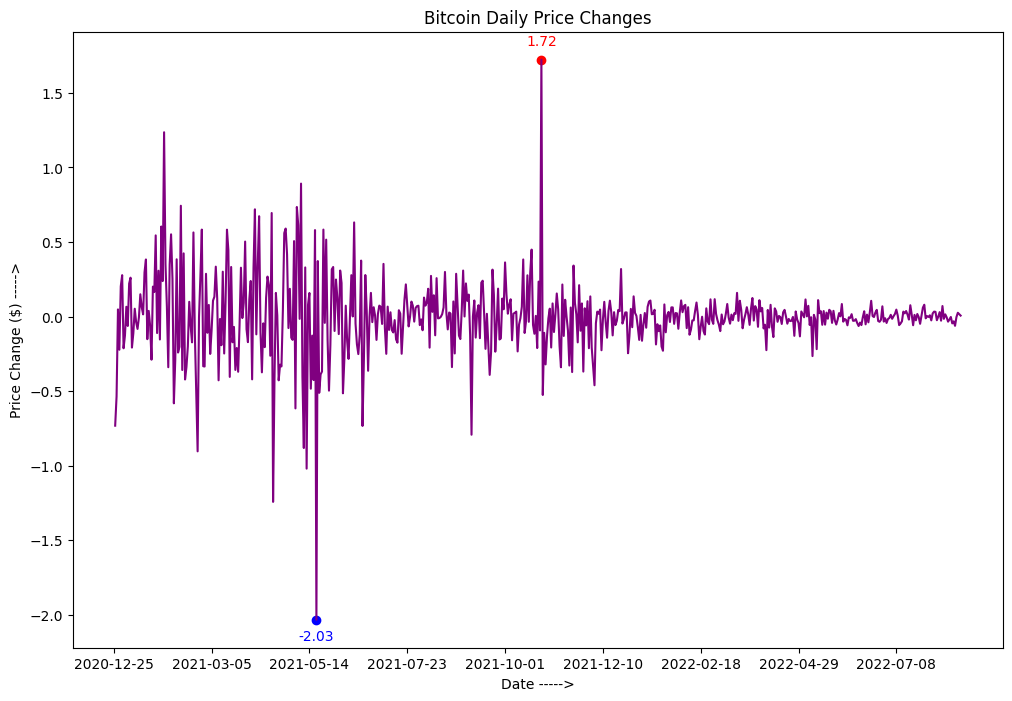

In [378]:
# Calculate daily price changes
df['Price_Change'] = df['Close'].diff()

# Annotate the maximum and minimum points
max_point = df[df['Price_Change'] == df['Price_Change'].max()]
min_point = df[df['Price_Change'] == df['Price_Change'].min()]

# Plotting Daily Price Changes
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Price_Change'], color='purple', label='Daily Price Change')

plt.scatter(max_point['Date'], max_point['Price_Change'], color='red', label='Max Point')
plt.scatter(min_point['Date'], min_point['Price_Change'], color='blue', label='Min Point')

# Annotate the points with their values
for i, txt in enumerate(max_point['Price_Change']):
    plt.annotate(f'{txt:.2f}', (max_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

for i, txt in enumerate(min_point['Price_Change']):
    plt.annotate(f'{txt:.2f}', (min_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, -15), ha='center', color='blue')

plt.title('Bitcoin Daily Price Changes')
plt.xlabel('Date ----->')
plt.ylabel('Price Change ($) ----->')
plt.legend

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::70], rotation=0)  # Adjust the step value as needed

plt.show()

1. From the plot of Bitcoin Daily Pice Changes,we are plotting the Date vs Price Changes in $ and this plot represents the daily price changes. 
1. The values of the maximum and minimum points are annotated on the plot.Red annotations are for maximum points and blue annotations are for minimum points.
1. The plot visualizes the daily changes in Bitcoin prices, showcasing the volatility in the market on a day-to-day basis. Positive values indicate price increases, while negative values represent price decreases.
1. The plot highlights maximum (positive) and minimum (negative) daily price changes. These extreme points can signify days of significant market movement or events impacting Bitcoin prices.
1. Higher peaks in the plot suggest periods of increased volatility, while lower points indicate relatively stable market conditions.
1. The annotations provide specific values for maximum and minimum daily price changes, offering a numerical reference for the corresponding dates. This information can be valuable for understanding the magnitude of price movements on specific days.
1. Consistent positive changes may indicate an upward trend, while persistent negative changes might suggest a downtrend. Sudden changes could be indicative of market events.
1. The periods of extreme daily price changes with external factors such as major news releases, regulatory developments, or macroeconomic events should be compared.Understanding the context behind these extreme movements can provide deeper insights into market dynamics.
1. Days with consistently positive changes may reflect optimism, while consecutive negative changes could indicate a more cautious or bearish sntiment.

In [379]:
# Calculate correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Vol.']].corr()


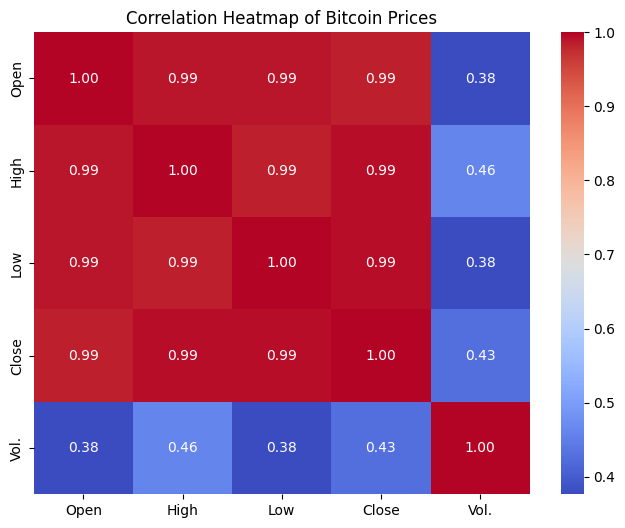

In [381]:
# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Bitcoin Prices')
plt.show()

- Next,we are plotting a Heatmap of Correlation Heatmap of Bitcoin Prices from the derived correlation matrix.The correlation matrix provides a comprehensive view of the relationships between different financial variables, including Open, High, Low, Close, and Volume (Vol.). Each cell in the matrix represents the correlation coefficient between the corresponding pairs of variables.
- Positive correlations (values close to 1) between two variables imply a tendency for those variables to move in the same direction. Negative correlations (values close to -1) suggest an inverse relationship, where one variable tends to move in the opposite direction of the other.
- We have examined the correlations between Open, High, Low, and Close prices. High positive correlations between these variables indicate a strong relationship in price movements. For example, a high correlation between Open and Close prices suggests that the closing price often aligns with the opening price. 
- Assess the correlation between price variables (Open, High, Low, Close) and trading volume (Vol.). A positive correlation between volume and price variables may indicate that higher trading volumes accompany significant price movements.
- Annotations on the heatmap provide the exact correlation coefficient.Focus on the values that are close to +1 or -1, as they represent strong correlations. Values around 0 indicate a weaker or negligible correlation.
- The coolwarm color map visually distinguishes between positive and negative correlations. Warmer colors (shades of red) represent positive correlations, while cooler colors (shades of blue) represent negative correlations.
- Analyze how different price components correlate with each other. For instance, a high correlation between High and Low prices might suggest less volatility, while a lower correlation may indicate larger price swings.
- Periodically update the correlation matrix to observe changes in relationships over time. Dynamic analysis helps adapt strategies to evolving market conditions.

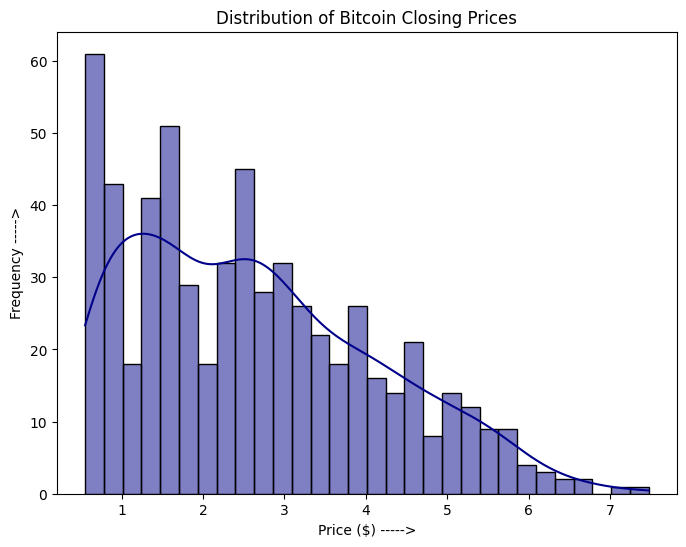

In [284]:
# Set the color palette
bar_color='darkblue'
line_color='blue'

# Histogram of Closing Prices with different colors for bars and KDE line
plt.figure(figsize=(8, 6))
sns.histplot(df['Close'], bins=30, kde=True, edgecolor='black', color=bar_color,  line_kws={'color': line_color})
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price ($) ----->')
plt.ylabel('Frequency ----->')
plt.show()

1. The histogram provides a visual representation of the distribution of Bitcoin closing prices. The x-axis represents the closing prices, and the y-axis represents the frequency or count of observations within each price range.The color palette chosen for the histogram bars is 'darkblue,' providing a visually distinct and easily recognizable color for the distribution.
1. The KDE line overlaid on the histogram provides a smoothed representation of the probability density function. It helps visualize the underlying distribution pattern and can be particularly useful for identifying modes or peaks.
1. Examine the central tendency of the is also examined closing prices, focusing on the location and spread of the distribution. Peaks and valleys in the KDE line may indicate potential clusters or pattern changes.
1. Assess the frequency of closing prices with is also assessedin specific ranges. This information is crucial for understanding where the majority of Bitcoin closing prices lie and identifying potion of Outliers.
1. Look for any noticeable deviations or outliers in the histogram. Outliers may represent unusual or extreme price movements that can be further investigated for potential market condtions. Smaller bins may reveal finer details, while larger bins provide a more generalized overview.
1. Traders and investors can use the distribution insights to inform their decision-making processes. For instance, a skewed distribution may suggest a prevailing trend, while a symmetric distribution may indicate a more stable market conditions.

In [382]:
# Highlight the highest and lowest points
highest_point = df[df['Close'] == df['Close'].max()]  # Use 'Close'
lowest_point = df[df['Close'] == df['Close'].min()]    # Use 'Close'

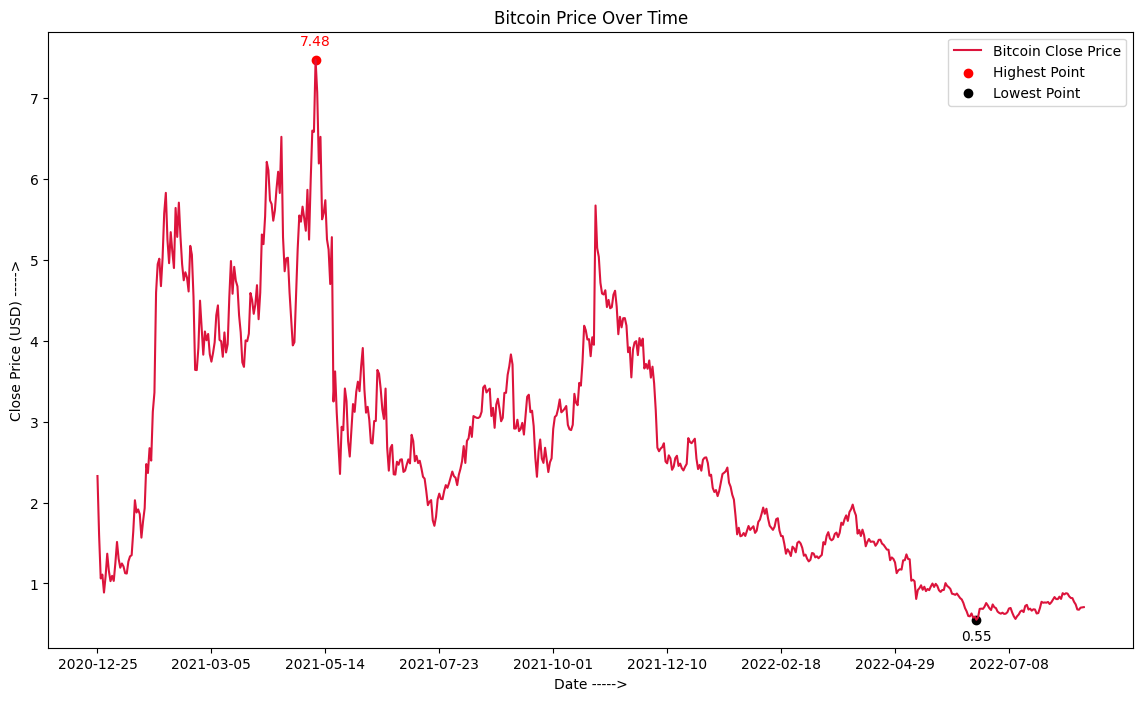

In [383]:
# Plotting Time Series
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Close'], label='Bitcoin Close Price',color='crimson')

plt.scatter(highest_point['Date'], highest_point['Close'], color='red', label='Highest Point')
plt.scatter(lowest_point['Date'], lowest_point['Close'], color='black', label='Lowest Point')

# Annotate the points with their values
for i, txt in enumerate(highest_point['Close']):
    plt.annotate(f'{txt:.2f}', (highest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

for i, txt in enumerate(lowest_point['Close']):
    plt.annotate(f'{txt:.2f}', (lowest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, -15), ha='center', color='black')

plt.title('Bitcoin Price Over Time')
plt.xlabel('Date ----->')
plt.ylabel('Close Price (USD) ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::70], rotation=0)  # Adjust the step value as needed

plt.show()

- The time series plot provides a comprehensive view of Bitcoin close prices over time. The x-axis represents the dates, and the y-axis represents the corresponding close prices.
- Trends may include upward, downward, or sideways movements. This insight is crucial for understanding the market's directions.
The red and black markers highlight the highest and lowest points in the time series, respectively. These extreme points can signify significant market events.
- Numeric annotations on the highest and lowest points provide specific values corresponding to those instances. This information is valuable for quantitative analysis and historical representation.
- Peaks in the time series may represent periods of high market activity or bullish sentiment, while valleys may indicate low points or bearish trends. - Analyzing these features aids in understanding market time series. Sudden spikes or dips may be indicative of external factors affecting the market, such as news events, regulatory changes.
- Assess the degree of volatility  is alos assessedin the time series. Volatile periods may be associated with rapid price changes, while stable periods may exhibit more gains in the time series. Periodic trends may be influenced by factors such as market sentiment, regulatory changes.
- Traders can leverage insights from the time series plot to inform their strategies. For instance, identifying potential reversal points or trend continuation patterns. continuations.

can aid in decision-making.

In [384]:
# Rename columns for consistency
df.rename(columns={'Volume': 'Vol.'}, inplace=True)

In [385]:
# Highlight the highest and lowest points
highest_point = df[df['Vol.'] == df['Vol.'].max()]  # Use 'Close'
lowest_point = df[df['Vol.'] == df['Vol.'].min()]    # Use 'Close'

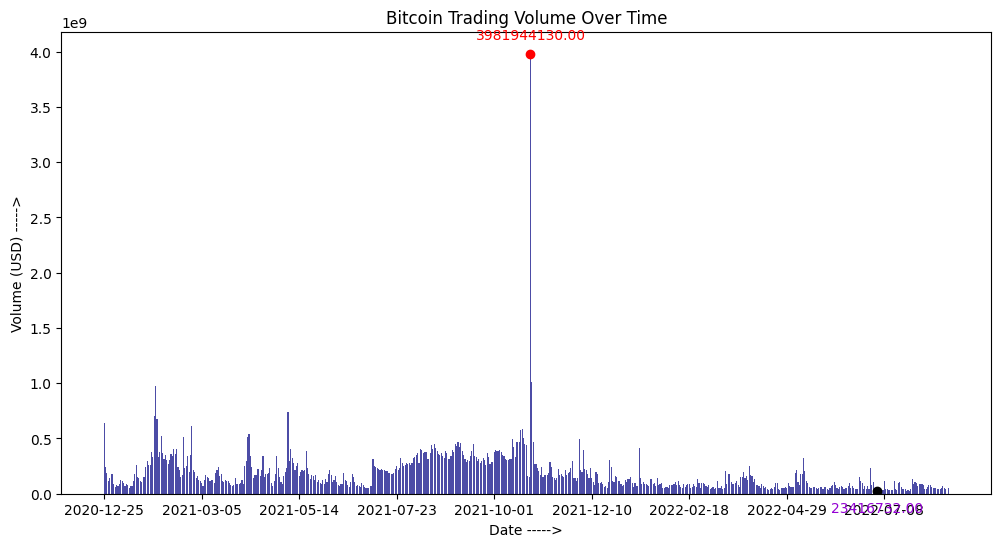

In [386]:
# Volume Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Vol.'], color='navy', alpha=0.7)

plt.scatter(highest_point['Date'], highest_point['Vol.'], color='red', label='Highest Point')
plt.scatter(lowest_point['Date'], lowest_point['Vol.'], color='black', label='Lowest Point')

# Annotate the points with their values
for i, txt in enumerate(highest_point['Vol.']):
    plt.annotate(f'{txt:.2f}', (highest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

for i, txt in enumerate(lowest_point['Vol.']):
    plt.annotate(f'{txt:.2f}', (lowest_point['Date'].iloc[i], txt), textcoords="offset points", xytext=(0, -15), ha='center', color='darkviolet')

plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date ----->')
plt.ylabel('Volume (USD) ----->')

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::70], rotation=0)  # Adjust the step value as needed
plt.show()

1. The bar chart visually represents the trading volume of Bitcoin over the specified time period. Each bar's height corresponds to the trading volume on a particular date.
1. The navy color of the bars enhances visibility and readability. Choosing appropriate colors is crucial for conveying information effectively.
1. The red and black markers indicate the dates with the highest and lowest trading volumes, respectively. These points signify exceptional activity levels and could be associated with noteworthy market events.
1. Numeric annotations on the highest and lowest volume points provide the exact volume values on those specific dates. This information is valuable for quantitative analysis and understanding the significance of extreme volume data.
1. Sudden spikes or drops in volume may coincide with significant market events, news releases, or changes in invest over time. Increasing or decreasing trends may reveal insights into changing market dynamics, investor interest, or the overall health  price movements. High volume during price increases or decreases may suggest the strength or weakness.
1. Identify periods of heightened market act is to be identifiedivity based on volume. These periods may coincide with increased volatility, trading opportunities, or shifts in market sentiment.
1. Compare extreme volume points with corre should be comparedto price movements. Understanding the relationship between volume and price is crucial for making informed trading decisions.
1. Traders can leverage insights from the volume chart to inform their strategies. For example, high-volume breakouts or breakdowns may signal potential trend reThe heatmap visually represents the correlation matrix of key financial metrics: 'Open,' 'High,' 'Low,' 'Close,' and 'Volume' for the cryptocurrency 1inch.

In [213]:
#Reading the dataset which is the csv file
df_bitcoin = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\bitcoin.csv")

# Display the first few rows to understand the structure of the data
print(df_bitcoin.head(),'\n')

         Date  Open  High  Low  Close  Volume Currency
0  2010-07-18   0.0   0.1  0.1    0.1      75      USD
1  2010-07-19   0.1   0.1  0.1    0.1     574      USD
2  2010-07-20   0.1   0.1  0.1    0.1     262      USD
3  2010-07-21   0.1   0.1  0.1    0.1     575      USD
4  2010-07-22   0.1   0.1  0.1    0.1    2160      USD 



In [216]:
# Check for missing values
print(df_bitcoin.isnull().sum(),'\n')

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64 



In [220]:
#'Date' column is converted to datetime format
df_bitcoin['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print("Number of duplicates:", df_bitcoin.duplicated().sum())

Number of duplicates: 0


In [214]:
df_ethereum = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\ethereum.csv")
# Display the first few rows to understand the structure of the data
print(df_ethereum.head(),'\n')

         Date   Open   High    Low  Close  Volume Currency
0  2016-03-10  11.20  11.85  11.07  11.75       4      USD
1  2016-03-11  11.75  11.95  11.75  11.95     179      USD
2  2016-03-12  11.95  13.45  11.95  12.92     833      USD
3  2016-03-13  12.92  15.07  12.92  15.07    1295      USD
4  2016-03-14  15.07  15.07  11.40  12.50   92183      USD 



In [217]:
# Check for missing values
print(df_ethereum.isnull().sum(),'\n')

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64 



In [221]:
#'Date' column is converted to datetime format
df_ethereum['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print("Number of duplicates:", df_ethereum.duplicated().sum())

Number of duplicates: 0


In [227]:
df_litecoin = pd.read_csv("C:\\Users\\Bandana\\OneDrive\\Documents\\PROJECT\\Top 100 Crypto Coins\\litecoin.csv")

# Display the first few rows to understand the structure of the data
print(df_litecoin.head(),'\n')

         Date  Open  High   Low  Close  Volume Currency
0  2016-08-24  3.95  3.96  3.61   3.84   21857      USD
1  2016-08-25  3.84  3.88  3.75   3.81   21870      USD
2  2016-08-26  3.81  3.90  3.77   3.81   14349      USD
3  2016-08-27  3.81  3.85  3.62   3.78    4906      USD
4  2016-08-28  3.78  3.78  3.62   3.72    8192      USD 



In [218]:
# Check for missing values
print(df_litecoin.isnull().sum(),'\n')

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64 



In [222]:
#'Date' column is converted to datetime format
df_litecoin['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print("Number of duplicates:", df_litecoin.duplicated().sum())

Number of duplicates: 0


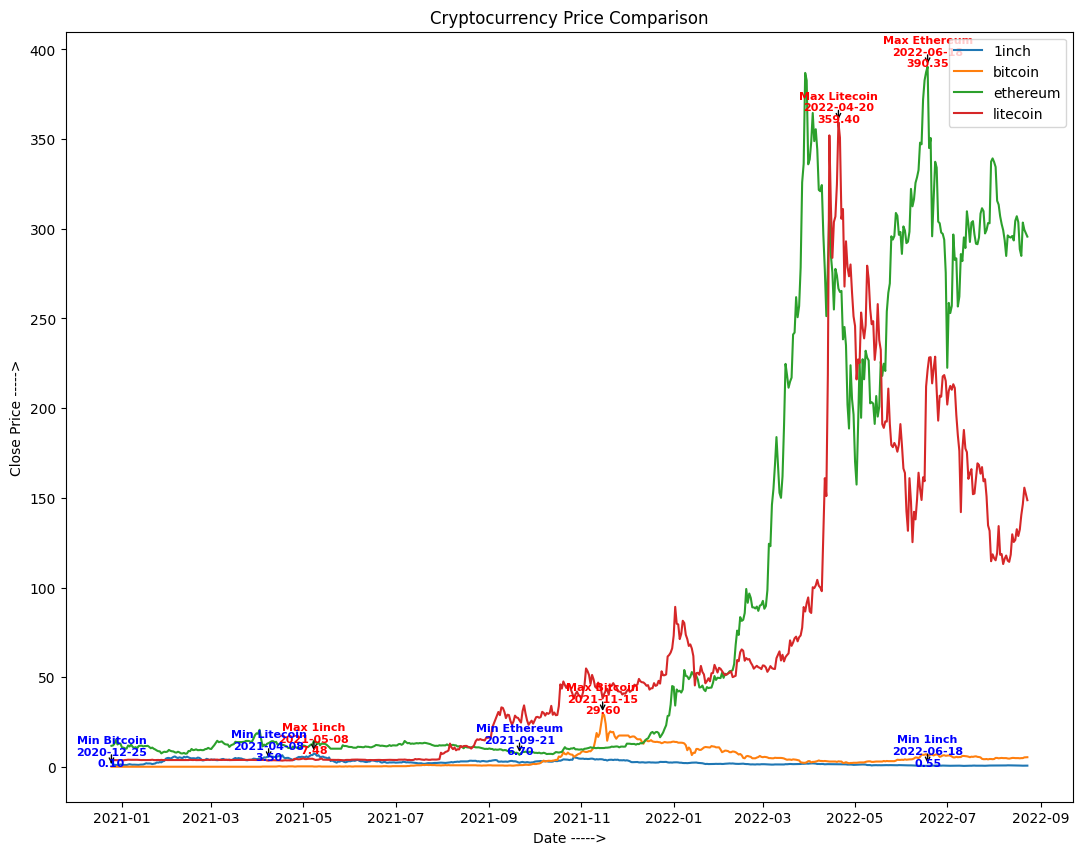

In [321]:
#Price Comparison with Other Cryptocurrencies:

#'Date' column is converted to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df_bitcoin['Date'] = pd.to_datetime(df['Date'])
df_ethereum['Date'] = pd.to_datetime(df['Date'])
df_litecoin['Date'] = pd.to_datetime(df['Date'])

# Assuming df_1inch, df_bitcoin, df_ethereum, and df_litecoin are your DataFrames

# Merging data on the 'Date' column
merged_data = pd.merge(df, df_bitcoin, on='Date', how='inner', suffixes=('_1inch', '_bitcoin'))
merged_data = pd.merge(merged_data, df_ethereum, on='Date', how='inner', suffixes=('_merged', '_ethereum'))
merged_data = pd.merge(merged_data, df_litecoin, on='Date', how='inner', suffixes=('_merged', '_litecoin'))

# Plotting using Seaborn
plt.figure(figsize=(13, 10))

# Check and plot each cryptocurrency if the corresponding column exists
for coin in ['1inch', 'bitcoin', 'ethereum', 'litecoin']:
    column_name = f'Close_{coin}'
    merged_data.rename(columns={'Close_merged':'Close_ethereum'},inplace=True)
    if column_name in merged_data.columns:
        sns.lineplot(x='Date', y=column_name, data=merged_data, label=coin)
    else:
        print(f"Column '{column_name}' not found in merged_data.")

# Annotate maximum points
for coin in ['1inch', 'bitcoin', 'ethereum', 'litecoin']:
    column_name = f'Close_{coin}'
    if column_name in merged_data.columns:
        max_point = merged_data.loc[merged_data[column_name].idxmax()]
        plt.annotate(f'Max {coin.capitalize()}\n{max_point["Date"].strftime("%Y-%m-%d")}\n{max_point[column_name]:.2f}', 
                     xy=(max_point['Date'], max_point[column_name]), xytext=(max_point['Date'], max_point[column_name] + 0),
                     arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=8, ha='center',color='red',weight='bold')

# Annotate minimum points
for coin in ['1inch', 'bitcoin', 'ethereum', 'litecoin']:
    column_name = f'Close_{coin}'
    if column_name in merged_data.columns:
        min_point = merged_data.loc[merged_data[column_name].idxmin()]
        plt.annotate(f'Min {coin.capitalize()}\n{min_point["Date"].strftime("%Y-%m-%d")}\n{min_point[column_name]:.2f}', 
                     xy=(min_point['Date'], min_point[column_name]), xytext=(min_point['Date'], min_point[column_name] - 0),
                     arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=8, ha='center',color='blue',weight='bold')

plt.title('Cryptocurrency Price Comparison')
plt.xlabel('Date ----->')
plt.ylabel('Close Price ----->')
plt.legend()
plt.show()

- The plot provides a visual representation of the closing prices of multiple cryptocurrencies over time. In this case, Bitcoin is compared with other cryptocurrencies like Ethereum, Litecoin, etc., assuming we have separate DataFrames for each.
- The red and blue dots on the plot highlight the maximum and minimum closing prices, respectively. These points are crucial for understanding the historical price behavior and potential turning points in the annotation.
- The exact closing prices at the maximum and minimum points are annotated on the plot. This information is valuable for traders and investors seeking to identify specific price levels associated with significant market moormance:
- By comparing the closing prices of different cryptocurrencies on theweme plot, you can assess their relative performance over time. Patterns of divergence or convergence may offer insights into markeing Points:
- Observing the entire plot allows for the identification of trends and potential turning points in the cryptocurrency market. Sudden spikes, troughs, or extended periods of stability can be indicative of market volatility.
- Volatility in the plot, characterized by sharp price movements, may correspond to events impacting the cryptocurrency market. 
- Consider extending the analysis by including statistical measures or indicators to quantitatively compare the performance of different cryptocurrencies. Metrics such as return on investment (ROI) or relative strength can provide s.
- Investors can use the plot to assess the risk associated with each cryptocurrency. Understanding the historical price range helps in setting realistic expectations.
- Further analysis could involve overlaying additional indicators, such as moving averages or trading volumes, to enhance the understanding of market trends and po points.
- Regularly updating the plot with new data allows for ongoing monitoring of cryptocurrency price movements and helps in adapting strategies based on the latest market conditions.

In [387]:
#Moving Average Crossover Strategy:
# Create a new column for the 50-day moving average
df['50_MA'] = df['Close'].rolling(window=50).mean()

In [388]:
# Find maximum and minimum points
max_close = df.loc[df['Close'].idxmax()]
min_close = df.loc[df['Close'].idxmin()]

max_50ma = df.loc[df['50_MA'].idxmax()]
min_50ma = df.loc[df['50_MA'].idxmin()]

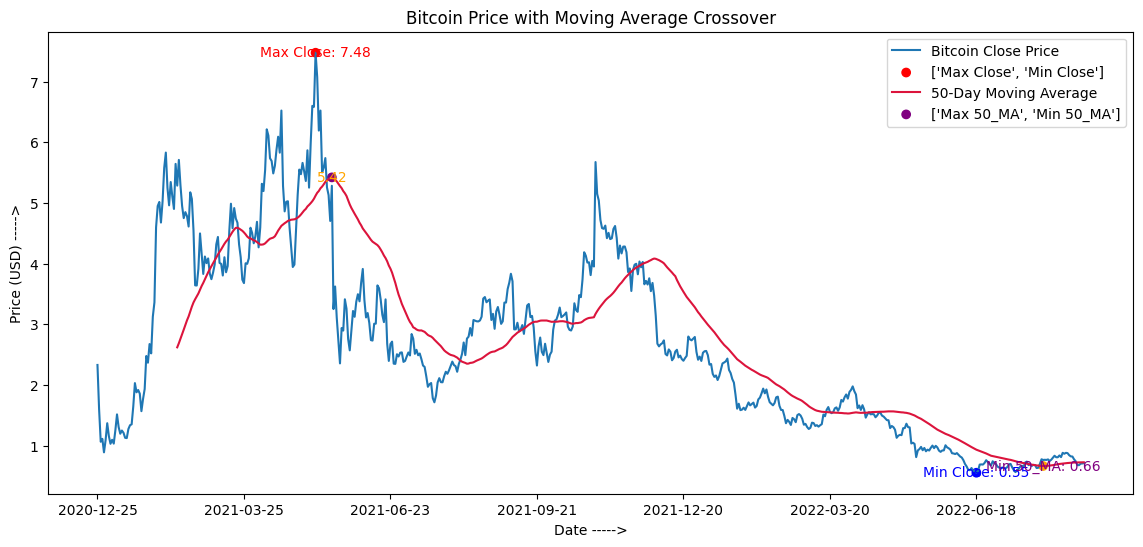

In [391]:
# Plotting the Closing Price and 50-day Moving Average
plt.figure(figsize=(14, 6))

# Plotting the first plot
plt.plot(df['Date'], df['Close'], label='Bitcoin Close Price')
plt.scatter([max_close['Date'], min_close['Date']], [max_close['Close'], min_close['Close']], color=['red', 'blue'], label=['Max Close', 'Min Close'])

# Annotate the points with their values
plt.annotate(f'Max Close: {max_close["Close"]:.2f}', xy=(max_close['Date'], max_close['Close']), xytext=(max_close['Date'], max_close['Close'] + 0),
             ha='center', va='center', color='red')

plt.annotate(f'Min Close: {min_close["Close"]:.2f}', xy=(min_close['Date'], min_close['Close']), xytext=(min_close['Date'], min_close['Close'] - 0),
             ha='center', va='center', color='blue')

# Plotting the second plot
plt.plot(df['Date'], df['50_MA'], label='50-Day Moving Average', color='crimson')
plt.scatter([max_50ma['Date'], min_50ma['Date']], [max_50ma['50_MA'], min_50ma['50_MA']], color=['purple', 'orange'], label=['Max 50_MA', 'Min 50_MA'])

# Annotate the points with their values
plt.annotate(f'{max_50ma["50_MA"]:.2f}', xy=(max_50ma['Date'], max_50ma['50_MA']), xytext=(max_50ma['Date'], max_50ma['50_MA'] + 0),
             ha='center', va='center', color='orange')

plt.annotate(f'Min 50_MA: {min_50ma["50_MA"]:.2f}', xy=(min_50ma['Date'], min_50ma['50_MA']), xytext=(min_50ma['Date'], min_50ma['50_MA'] - 0),
             ha='center', va='center', color='purple')

plt.title('Bitcoin Price with Moving Average Crossover')
plt.xlabel('Date ----->')
plt.ylabel('Price (USD) ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::90], rotation=0)  # Adjust the step value as needed

plt.show()

1. The plot visualizes the 50-day moving average (50_MA) overlaid on Bitcoin's closing prices. A common analysis technique involves observing crossovers between short-term (50-day) and long-term (e.g., 200-day) moving averages.
1. The red and blue dots signify the maximum and minimum closing prices, respectively. These points offer insights into historical extremes, potentially indicating pivotal moments in the market.
1. The values of the maximum and minimum closing prices are explicitly annotated on the plot. This information helps in understanding the price levels associated with significant market movements.
1. The purple and orange dots represent the maximum and minimum points on the 50-day moving average. Identifying these points aids in recognizing periods of pronounced price momentum or potential reversals.
1. The values of the maximum and minimum points on the 50-day moving average are annotated on the plot. Understanding the levels at which crossovers or extreme values occur is essential for technical analysis.
1. Observing the relationship between Bitcoin's closing prices and the 50-day moving average allows for the identification of crossovers. A bullish signal may emerge when the closing price crosses above the moving average, and vice versa for a bearish signal.
1. Periods of convergence or divergence between the closing prices and the moving average can offer insights into the prevailing market trend. Traders often use crossovers to confirm or anticipate trend changes.

In [392]:
#Rolling Volatility:

# Calculate rolling volatility
df['Volatility'] = df['Close'].pct_change().rolling(window=30).std()

In [393]:
# Find coordinates of the maximum and minimum points
max_volatility_point = df.loc[df['Volatility'].idxmax()]
min_volatility_point = df.loc[df['Volatility'].idxmin()]

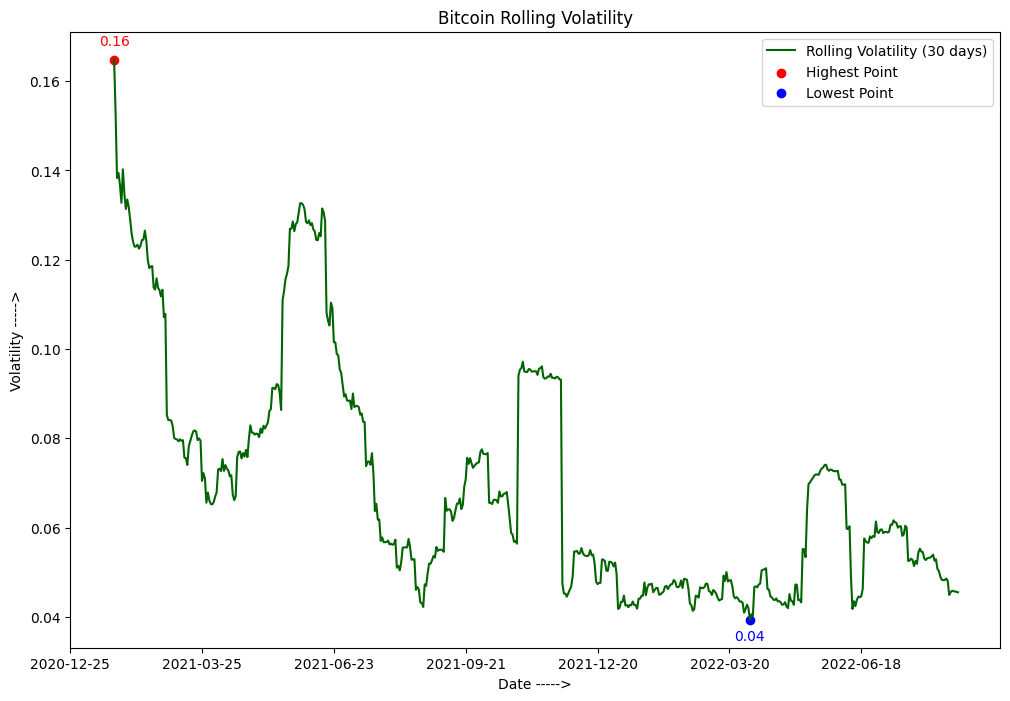

In [394]:
# Plotting the rolling volatility
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Volatility'], label='Rolling Volatility (30 days)', color='darkgreen')

# Annotate the maximum and minimum points
plt.scatter([max_volatility_point['Date']], [max_volatility_point['Volatility']], color='red', label='Highest Point')
plt.scatter([min_volatility_point['Date']], [min_volatility_point['Volatility']], color='blue', label='Lowest Point')

plt.annotate(f'{max_volatility_point["Volatility"]:.2f}', (max_volatility_point['Date'], max_volatility_point['Volatility']),textcoords="offset points",
             xytext=(0, 10), ha='center', color='red')

plt.annotate(f'{min_volatility_point["Volatility"]:.2f}', (min_volatility_point['Date'], min_volatility_point['Volatility']),textcoords="offset points",
             xytext=(0, -15), ha='center', color='blue')

plt.title('Bitcoin Rolling Volatility')
plt.xlabel('Date ----->')
plt.ylabel('Volatility ----->')
plt.legend()

# Reduce the number of x-axis ticks
plt.xticks(df['Date'].iloc[::90], rotation=0)  # Adjust the step value as needed

plt.show()

- The rolling volatility is computed based on the percentage change in Bitcoin's closing prices over a 30-day rolling window. This metric provides a measure of the price variability or risk in the market.
- The plot visualizes the rolling volatility over time, offering a dynamic perspective on how the degree of price fluctuation evolves.
- The red and blue dots on the plot represent the points of maximum and minimum rolling volatility, respectively. These extremes indicate periods of heightened and reduced market uncertainty.
- The values of the maximum and minimum rolling volatility points are explicitly annotated on the plot. This information is crucial for understanding the magnitude of price movements during periods of high and low volatility.
- Observing the rolling volatility allows for the identification of trends in market risk. Peaks in volatility may coincide with significant market events, news releases, or macroeconomic developments.
- Traders and investors can use rolling volatility to assess the level of risk in the market. High volatility may present opportunities for profit but also carries increased risk, while low volatility may suggest a more stable market environment.
- Spikes in rolling volatility can indicate periods of market stress or uncertainty. Understanding the context surrounding these spikes is essential for anticipating potential market reactions.
- Shifts in the pattern of rolling volatility may signal changes in the market regime. For example, a sustained increase in volatility may indicate the onset of a more volatile market environment.

In [395]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv')

**Conclusion:**
In summary, this project provided a comprehensive analysis of Bitcoin market dynamics, offering actionable insights for traders and investors. The combination of exploratory data analysis, visualizations, and key observations contributes to a holistic understanding of Bitcoin's price behavior over time. Here are the conclusions:

**Overall Price Trend:**
1. Visualize the closing prices over time to understand the general trend of Bitcoin prices.
2. Calculate and plot a simple moving average to identify trends more clearly.

**Volatility Analysis:**
1. Calculate the daily percentage change in prices to assess the volatility of Bitcoin.
2. Plot a volatility index or standard deviation to highlight periods of high and low volatility.

**Key Price Levels:**
1. Identify significant support and resistance levels based on the low and high prices.

**Trading Volume Patterns:**
1. Examine trading volume patterns over time to identify potential correlations with price movements.
2. Look for volume spikes and their association with price changes.

**Correlation Analysis:**
1. Explore correlations between closing prices and trading volume to understand potential relationships.

**Seasonality Analysis:**
1. Investigate if there's any recurring pattern or seasonality in the data, such as trends repeating at specific intervals.

**Event Impact Analysis:**
1. If available, examine the impact of major events (regulatory changes, market news) on price and volume movements.

**Risk and Return:**
1. Calculate and compare daily, weekly, and monthly returns to assess the risk and return profile of Bitcoin.anomalies discovered in the data.